### Imports necessary for running the program

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  5 23:01:42 2019

@author: Ahmed
"""

from openpyxl import load_workbook
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import pandas as pd
'''df = pd.read_excel("MLDataSet.xlsx")
df2 = pd.read_excel("ADRs.xlsx")
df3 = pd.read_excel("DS.xlsx")
df4 = pd.read_excel("Mental.xlsx")

df5=[df, df2,  df3, df4]

result = pd.concat([df,df2,df3, df4], axis=1, join_axes=[df.index])'''
#result.to_excel('result.xlsx')


'df = pd.read_excel("MLDataSet.xlsx")\ndf2 = pd.read_excel("ADRs.xlsx")\ndf3 = pd.read_excel("DS.xlsx")\ndf4 = pd.read_excel("Mental.xlsx")\n\ndf5=[df, df2,  df3, df4]\n\nresult = pd.concat([df,df2,df3, df4], axis=1, join_axes=[df.index])'

In [2]:
def removeColumns(result):
    del result['Pain']
    del result['Content']
    del result['Filtered']
    del result['Stemmed']
    del result['big1']
    del result['big2']
    del result['small1']
    del result['small2']
    del result['Height']
    del result['Joined']
    del result['Posted']
    

In [3]:
def vectorizeCount(result):
    '''for i in range(len(result)):
        if result[i]==0:
            result[i]=0
        if result[i]>0 and result[i]<=3:
            result[i]=1
        if result[i]>3:
            result[i]=2'''
    for i in range(len(result)):
        if result.at[i,'MentalCount']==0:
            result.at[i,'MentalCount']=0
        if result.at[i,'MentalCount']>0 and result.at[i,'MentalCount']<=3:
            result.at[i,'MentalCount']=1
        if result.at[i,'MentalCount']>3:
            result.at[i,'MentalCount']=2
            
        if result.at[i,'ADRCount']==0:
            result.at[i,'ADRCount']=0
        if result.at[i,'ADRCount']>0 and result.at[i,'MentalCount']<=3:
            result.at[i,'ADRCount']=1
        if result.at[i,'ADRCount']>3:
            result.at[i,'ADRCount']=2

        if result.at[i,'DieaseCount']==0:
            result.at[i,'DieaseCount']=0
        if result.at[i,'DieaseCount']>0 and result.at[i,'DieaseCount']<=3:
            result.at[i,'DieaseCount']=1
        if result.at[i,'DieaseCount']>3:
            result.at[i,'DieaseCount']=2
    return result

In [4]:
def vectorizeCount2(result):
    '''for i in range(len(result)):
        if result[i]==0:
            result[i]=0
        if result[i]>0 and result[i]<=3:
            result[i]=1
        if result[i]>3:
            result[i]=2'''
    for i in range(len(result)):
        '''if result.at[i,'MentalCount']==0:
            result.at[i,'MentalCount']=0
        if result.at[i,'MentalCount']>0:
            result.at[i,'MentalCount']=1
        '''    
        if result.at[i,'ADRCount']==0:
            result.at[i,'ADR']=0
        if result.at[i,'ADRCount']>0:
            result.at[i,'ADR']=1
        '''
        if result.at[i,'DieaseCount']==0:
            result.at[i,'DieaseCount']=0
        if result.at[i,'DieaseCount']>0:
            result.at[i,'DieaseCount']=1
        ''' 
    return result

In [5]:
'''result=pd.read_excel('result_reduced.xlsx')
weighted=pd.read_excel('Weighted_reduced.xlsx')
blood=pd.read_excel('blood_reduced.xlsx')
ask=pd.read_excel('askapatient_reduced.xlsx')

result=vectorizeCount2(result)
weighted=vectorizeCount2(weighted)
blood=vectorizeCount2(blood)
ask=vectorizeCount2(ask)

result.to_excel('result_reduced.xlsx')
weighted.to_excel('Weighted_reduced.xlsx')
blood.to_excel('blood_reduced.xlsx')
ask.to_excel('askapatient_reduced.xlsx')'''

"result=pd.read_excel('result_reduced.xlsx')\nweighted=pd.read_excel('Weighted_reduced.xlsx')\nblood=pd.read_excel('blood_reduced.xlsx')\nask=pd.read_excel('askapatient_reduced.xlsx')\n\nresult=vectorizeCount2(result)\nweighted=vectorizeCount2(weighted)\nblood=vectorizeCount2(blood)\nask=vectorizeCount2(ask)\n\nresult.to_excel('result_reduced.xlsx')\nweighted.to_excel('Weighted_reduced.xlsx')\nblood.to_excel('blood_reduced.xlsx')\nask.to_excel('askapatient_reduced.xlsx')"

### manipulating data to prepare for classification

In [6]:
def manipulate(result,label):
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    result['Gender']=imp_mean.fit_transform(result['Gender'].values.reshape(-1, 1))
    #result = vectorizeCount(result)
    for i in range(len(result)):
        if result.at[i,'Gender']=='Male':
            result.at[i,'Gender']=0
        if result.at[i,'Gender']=='Female':
            result.at[i,'Gender']=1
    result['Drug']=LabelEncoder().fit_transform(result['Drug'])
    if 'Unnamed: 0' in result:
        del result['Unnamed: 0'] 
    result['DrugFamily']=LabelEncoder().fit_transform(result['DrugFamily'])
    labels=result.iloc[:][label]
    del result[label]
    #removeColumns(result)
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
    result['Age']=imp_mean.fit_transform(result['Age'].values.reshape(-1, 1))
    if 'Height' in result:
        result['Height']=imp_mean.fit_transform(result['Height'].values.reshape(-1, 1))
    return result,labels

In [7]:

#asklabel=pd.read_excel('asklabels.xlsx')
#labels=asklabel.iloc[:]['MICROCEPHALY , EPILEPSY , AND DIABETES SYNDROME']

In [8]:

def SMOTE(begin,columns):
    from imblearn.over_sampling import SMOTENC
    x=[1]
    x.extend(list(range(begin,len(columns))))
    sm=SMOTENC(random_state=42, categorical_features=x)
    return sm


### Datasets

In [9]:
label='ADRCount'
asklabel='ADRCount'

#from collections import Counter
#X_res, y_res = sm.fit_resample(result, result_labels)
#print(Counter(result_labels))
#print(Counter(y_res))
def prepareDataset(label,asklab):
    from imblearn.over_sampling import SMOTENC
    
    
    result=pd.read_excel('result_reduced.xlsx')
    weighted=pd.read_excel('Weighted_reduced.xlsx')
    blood=pd.read_excel('blood_reduced.xlsx')
    ask=pd.read_excel('askapatient_reduced.xlsx')

    result,result_labels=manipulate(result,label)
    weighted,weighted_labels=manipulate(weighted,label)
    blood,blood_labels=manipulate(blood,label)
    ask,ask_labels=manipulate(ask,asklab)
    
 

    sm1 = SMOTE(2,result.columns)
    sm2 = SMOTE(4,weighted.columns)
    sm3 = SMOTE(4,blood.columns)
    sm4 = SMOTE(2,ask.columns)
    #Applying SMOTENC
    result,result_labels=sm1.fit_resample(result,result_labels)
    weighted,weighted_labels=sm2.fit_resample(weighted,weighted_labels)
    blood,blood_labels=sm3.fit_resample(blood,blood_labels)
    ask,ask_labels=sm4.fit_resample(ask,ask_labels)
    return result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels


In [10]:
label='ADRCount'
asklabel='ADRCount'

#from collections import Counter
#X_res, y_res = sm.fit_resample(result, result_labels)
#print(Counter(result_labels))
#print(Counter(y_res))
def prepareDatasetNoSmote(label,asklab):
    from imblearn.over_sampling import SMOTENC
    
    sm = SMOTENC(random_state=42, categorical_features=[0, 1,3])
    
    result=pd.read_excel('result_reduced.xlsx')
    weighted=pd.read_excel('Weighted_reduced.xlsx')
    blood=pd.read_excel('blood_reduced.xlsx')
    ask=pd.read_excel('askapatient_reduced.xlsx')


    result,result_labels=manipulate(result,label)
    weighted,weighted_labels=manipulate(weighted,label)
    blood,blood_labels=manipulate(blood,label)
    ask,ask_labels=manipulate(ask,asklab)
    
    
    #Applying SMOTENC
    #result,result_labels=sm.fit_resample(result,result_labels)
    #weighted,weighted_labels=sm.fit_resample(weighted,weighted_labels)
    #blood,blood_labels=sm.fit_resample(blood,blood_labels)
    #ask,ask_labels=sm.fit_resample(ask,ask_labels)
    return result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels


In [11]:
'''for i in weighted:
    if i not in result:
        if i != 'weights2':
            del weighted[i]
weighted.to_excel('Weighted.xlsx')'''

"for i in weighted:\n    if i not in result:\n        if i != 'weights2':\n            del weighted[i]\nweighted.to_excel('Weighted.xlsx')"

In [12]:
#ask_labels

In [13]:
'''for i in weighted:
    print (weighted[i])'''

'for i in weighted:\n    print (weighted[i])'

In [14]:
def get_score(model, X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)

### 10-Fold Cross validation

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#cross_val_score(RandomForestClassifier(n_estimators=1000),result,result_labels,cv=10)

In [16]:
#This was used for some other no longer existing purposes
def getMissingPercentage(feature):
    #nancount = int(result[result[feature].isnull()][feature].shape[0])
    nancount = int(result[result[feature]==1][feature].shape[0])
    size=int(result.shape[0])
    print (nancount)
    print ((nancount*100)/size)
#getMissingPercentage('Pvc')

In [17]:
def importance(result,result_labels):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectFromModel
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    X_train, X_test, Y_train, Y_test = pd.DataFrame(X_train),pd.DataFrame(X_test),pd.DataFrame(Y_train),pd.DataFrame(Y_test),
    #print(Counter(result_labels))
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
    sel.fit(X_train, Y_train)
    #print(sel.get_support())
    selected_feat= X_train.columns[(sel.get_support())]
    
    #print(len(selected_feat))
    print(selected_feat)


    return selected_feat

In [18]:
def plotResult(name,max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots()
    width = 0.2

    acc_m = (max_res['Accuracy'][x1],max_wei['Accuracy'][x2],max_bld['Accuracy'][x3],max_ask['Accuracy'][x4])
    pre_m = (max_res['Precision'][x1],max_wei['Precision'][x2],max_bld['Precision'][x3],max_ask['Precision'][x4])
    rec_m = (max_res['Recall'][x1],max_wei['Recall'][x2],max_bld['Recall'][x3],max_ask['Recall'][x4])
    fse_m = (max_res['FScore'][x1],max_wei['FScore'][x2],max_bld['FScore'][x3],max_ask['FScore'][x4])

    ind = np.arange(len(acc_m)) 
    old_ind =  ind
    rects1 = ax.bar(ind,acc_m, width=width ,label='accuracy')
    ind = ind + width
    rects2 = ax.bar(ind,pre_m, width=width,label='Precision')
    ind = ind + width
    rects3 = ax.bar(ind,rec_m, width=width,label='recall')
    ind = ind + width
    rects4 = ax.bar(ind,fse_m, width=width ,label='fscore')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(name)
    ax.set_xticks(old_ind+ width *2)
    ax.set_xticklabels(('complete', 'weighted', 'pressure', 'ask'))
    box = ax.get_position()
    ax.set_position([box.x0, box.y0,box.width, box.height * 0.6])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True,shadow=True, ncol=4)
    fig.tight_layout()
    plt.show()

In [19]:
'''from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=10)

scores_rf=[]

for train_index, test_index in kf.split(result):
    X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=400),X_train, X_test, Y_train, Y_test))'''

'from sklearn.model_selection import KFold\nfrom sklearn.ensemble import RandomForestClassifier\nkf = KFold(n_splits=10)\n\nscores_rf=[]\n\nfor train_index, test_index in kf.split(result):\n    X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]\n    scores_rf.append(get_score(RandomForestClassifier(n_estimators=400),X_train, X_test, Y_train, Y_test))'

### Random Forest Classifier Function 

In [20]:
def randomForest(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = RandomForestClassifier(n_estimators=estimators,random_state=0)
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### Random Forest

100
Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8430717863105175 # Scores: (0.8457043978516371, 0.8429988851727983, 0.8427522956276949, None)
Wei: Accuracy: 0.875 # Scores: (0.8793548387096775, 0.875, 0.8746402302526384, None)
Bld: Accuracy: 0.8461538461538461 # Scores: (0.8462549968440984, 0.8466926479882031, 0.8461174242424243, None)
Ask: Accuracy: 0.8964497041420119 # Scores: (0.9011735419630156, 0.8952005605184796, 0.8958800904778249, None)
200
Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8414023372287145 # Scores: (0.8446639648767309, 0.8413210702341137, 0.8410035177325572, None)
Wei: Accuracy: 0.875 # Scores: (0.8793548387096775, 0.875, 0.8746402302526384, None)
Bld: Accuracy: 0.8512820512820513 # Scores: (0.8516414141414141, 0.8520117969243732, 0.851266405407538, None)
Ask: Accuracy: 0.893491124260355 # Scores: (0.8967312391543011, 

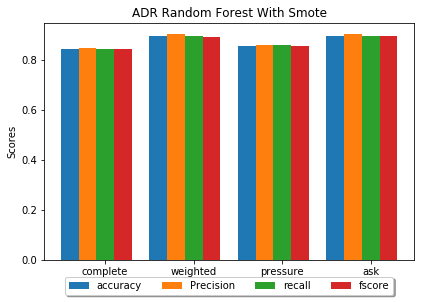

In [22]:
label='ADR'
asklabel='ADR'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
    res_acc,res_scores=randomForest(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(ask,ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''
x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest With Smote",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)

import os.path
if not os.path.exists('Forrest_StatsTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

### Random Forests with importance

100


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 6, 7, 8, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 10, 13], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 5, 6, 7], dtype='int64')
Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8096828046744574 # Scores: (0.8153361344537815, 0.8095707915273133, 0.8087869623655912, None)
Wei: Accuracy: 0.8392857142857143 # Scores: (0.8432258064516129, 0.8392857142857143, 0.8388231531819634, None)
Bld: Accuracy: 0.8051282051282052 # Scores: (0.8066097406704618, 0.806351379818833, 0.8051230801598991, None)
Ask: Accuracy: 0.863905325443787 # Scores: (0.8668059638063534, 0.8628481345244352, 0.8633263009845289, None)
200


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 6, 7, 8, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 12], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 10, 13], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 5, 6, 7], dtype='int64')
Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8046744574290484 # Scores: (0.8094207986952681, 0.8045707915273133, 0.8038851904398123, None)
Wei: Accuracy: 0.8928571428571429 # Scores: (0.8948717948717949, 0.8928571428571428, 0.89272030651341, None)
Bld: Accuracy: 0.8051282051282052 # Scores: (0.8066097406704618, 0.806351379818833, 0.8051230801598991, None)
Ask: Accuracy: 0.8698224852071006 # Scores: (0.8727910188759429, 0.8687686109651427, 0.869268635724332, None)
300


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 6, 7, 8, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 10, 11, 13], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 5, 6, 7], dtype='int64')
Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8063439065108514 # Scores: (0.811382030878052, 0.80623745819398, 0.8055194805194805, None)
Wei: Accuracy: 0.8392857142857143 # Scores: (0.8397190293742018, 0.8392857142857142, 0.8392344497607656, None)
Bld: Accuracy: 0.8256410256410256 # Scores: (0.8257416368609299, 0.8261533600168528, 0.8255997474747475, None)
Ask: Accuracy: 0.8698224852071006 # Scores: (0.8727910188759429, 0.8687686109651427, 0.869268635724332, None)
400


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 6, 7, 8, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 10, 12], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 10, 13], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 5, 6, 7], dtype='int64')
Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8063439065108514 # Scores: (0.811382030878052, 0.80623745819398, 0.8055194805194805, None)
Wei: Accuracy: 0.8928571428571429 # Scores: (0.8928571428571429, 0.8928571428571429, 0.8928571428571429, None)
Bld: Accuracy: 0.8 # Scores: (0.8010322308826627, 0.8010322308826627, 0.7999999999999999, None)
Ask: Accuracy: 0.863905325443787 # Scores: (0.8660660660660661, 0.8629882641443335, 0.8634271459189768, None)
500


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 6, 7, 8, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 12], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 10, 11, 13], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 5, 6, 7], dtype='int64')
Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8063439065108514 # Scores: (0.810859134528336, 0.8062430323299888, 0.805602184471452, None)
Wei: Accuracy: 0.875 # Scores: (0.8754789272030651, 0.875, 0.8749601275917065, None)
Bld: Accuracy: 0.8307692307692308 # Scores: (0.8311237373737373, 0.831472508953023, 0.8307514268430605, None)
Ask: Accuracy: 0.863905325443787 # Scores: (0.8660660660660661, 0.8629882641443335, 0.8634271459189768, None)
600


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 6, 7, 8, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 12], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 10, 11, 13], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 5, 6, 7], dtype='int64')
Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8046744574290484 # Scores: (0.8094207986952681, 0.8045707915273133, 0.8038851904398123, None)
Wei: Accuracy: 0.8928571428571429 # Scores: (0.8948717948717949, 0.8928571428571428, 0.89272030651341, None)
Bld: Accuracy: 0.8358974358974359 # Scores: (0.8365789473684211, 0.8367916578891932, 0.8358931201346518, None)
Ask: Accuracy: 0.863905325443787 # Scores: (0.8660660660660661, 0.8629882641443335, 0.8634271459189768, None)
700


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 6, 7, 8, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 12], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 10, 13], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 5, 6, 7], dtype='int64')
Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8013355592654424 # Scores: (0.8060287222234807, 0.801231884057971, 0.8005328005328005, None)
Wei: Accuracy: 0.8928571428571429 # Scores: (0.8948717948717949, 0.8928571428571428, 0.89272030651341, None)
Bld: Accuracy: 0.8 # Scores: (0.8010322308826627, 0.8010322308826627, 0.7999999999999999, None)
Ask: Accuracy: 0.863905325443787 # Scores: (0.8660660660660661, 0.8629882641443335, 0.8634271459189768, None)
800


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 6, 7, 8, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 10, 12], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 10, 13], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 5, 6, 7], dtype='int64')
Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8030050083472454 # Scores: (0.8079870321249631, 0.8028985507246377, 0.802166368114644, None)
Wei: Accuracy: 0.8928571428571429 # Scores: (0.8928571428571429, 0.8928571428571429, 0.8928571428571429, None)
Bld: Accuracy: 0.8 # Scores: (0.8010322308826627, 0.8010322308826627, 0.7999999999999999, None)
Ask: Accuracy: 0.863905325443787 # Scores: (0.8660660660660661, 0.8629882641443335, 0.8634271459189768, None)
900


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 6, 7, 8, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 12], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 2, 4, 5, 8, 9, 10, 13], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 1, 5, 6, 7], dtype='int64')
Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8013355592654424 # Scores: (0.8065577490356252, 0.8012263099219621, 0.8004456874420843, None)
Wei: Accuracy: 0.8928571428571429 # Scores: (0.8948717948717949, 0.8928571428571428, 0.89272030651341, None)
Bld: Accuracy: 0.8 # Scores: (0.8010322308826627, 0.8010322308826627, 0.7999999999999999, None)
Ask: Accuracy: 0.8668639053254438 # Scores: (0.8694114318053198, 0.8658784375547381, 0.8663479873114066, None)


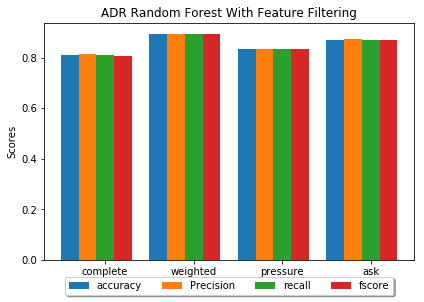

In [27]:
label='ADR'
asklabel='ADR'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)

for estimators in range (100,1000,100):
    print (estimators)
    res_feat=importance(result,result_labels)
    wei_feat=importance(weighted,weighted_labels)
    blood_feat=importance(blood,blood_labels)
    ask_feat=importance(ask,ask_labels)
    res_acc,res_scores=randomForest(pd.DataFrame(result)[res_feat],result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(pd.DataFrame(weighted)[wei_feat],weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(pd.DataFrame(blood)[blood_feat],blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(pd.DataFrame(ask)[ask_feat],ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest With Feature Filtering",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)

import os.path
if not os.path.exists('Forrest_StatsImportanceTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsImportanceTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsImportanceTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsImportanceTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

100
Counter({1: 997, 0: 560})
Counter({1: 93, 0: 37})
Counter({1: 325, 0: 137})
Counter({1: 562, 0: 194})
Res: Accuracy: 0.7863247863247863 # Scores: (0.7666660366303135, 0.7854411556436766, 0.772338107098381, None)
Wei: Accuracy: 0.6410256410256411 # Scores: (0.4959677419354839, 0.496551724137931, 0.49444444444444446, None)
Bld: Accuracy: 0.8633093525179856 # Scores: (0.8379703232644409, 0.8220959595959596, 0.8293596950313369, None)
Ask: Accuracy: 0.8237885462555066 # Scores: (0.76059008509064, 0.8015949475487048, 0.7758246099150702, None)
200
Counter({1: 997, 0: 560})
Counter({1: 93, 0: 37})
Counter({1: 325, 0: 137})
Counter({1: 562, 0: 194})
Res: Accuracy: 0.7863247863247863 # Scores: (0.7652946232451533, 0.7810103789426832, 0.7707455667679044, None)
Wei: Accuracy: 0.6666666666666666 # Scores: (0.55, 0.5465517241379311, 0.5477252453166817, None)
Bld: Accuracy: 0.8345323741007195 # Scores: (0.8011393746687865, 0.7869949494949495, 0.793435420301092, None)
Ask: Accuracy: 0.810572687224

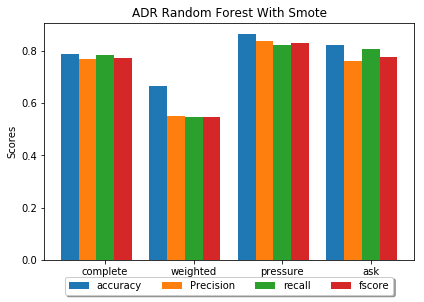

In [26]:
label='ADR'
asklabel='ADR'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
for estimators in range (100,1000,100):
    print (estimators)
    
    res_acc,res_scores=randomForest(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(ask,ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''
x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest With Smote",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)

import os.path
if not os.path.exists('Forrest_StatsSmoteless'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsSmoteless'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsSmoteless'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsSmoteless'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

In [26]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
    res_feat=importance(result,result_labels)
    wei_feat=importance(weighted,weighted_labels)
    blood_feat=importance(blood,blood_labels)
    ask_feat=importance(ask,ask_labels)
    res_acc,res_scores=randomForest(pd.DataFrame(result)[res_feat],result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(pd.DataFrame(weighted)[wei_feat],weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(pd.DataFrame(blood)[blood_feat],blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(pd.DataFrame(ask)[ask_feat],ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)

writer = pd.ExcelWriter('Forrest_Stats'+label+'importancesmoteless.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()

100


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.6837606837606838 # Scores: (0.6870343893445707, 0.681688596491228, 0.6806756781677024, None)
Wei: Accuracy: 0.7435897435897436 # Scores: (0.6834415584415584, 0.6834415584415584, 0.6834415584415584, None)
Bld: Accuracy: 0.7769784172661871 # Scores: (0.7679263565891472, 0.74447391688771, 0.7521426517112453, None)
Ask: Accuracy: 0.7929515418502202 # Scores: (0.6177283304246655, 0.615149359886202, 0.6164024017545752, None)
200


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})


KeyboardInterrupt: 

### Random Forest Classifier Function 10-Fold

In [38]:
def average(scores):
    FScore=0
    Recall=0
    Precision=0

    for i in scores:
        Precision+=i[0]
        Recall+=i[1]
        FScore+=i[2]
    return (Precision/3,Recall/3,FScore/3)

In [39]:
def randomForest10Fold(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=3)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = RandomForestClassifier(n_estimators=estimators, max_depth=2,random_state=0)
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [44]:
def randomForest10FoldNotSmote(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=3)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
        clf = RandomForestClassifier(n_estimators=estimators, max_depth=2,random_state=0)
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### Random Forest with 10-Fold Cross Validation

Counter({0: 1168, 1: 1168})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 590})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.2854086435601198 # Scores: (0.4347679695505782, 0.4122330571645037, 0.28281675830606157)
Wei: Accuracy: 0.5321092278719397 # Scores: (0.6833633017843543, 0.7032721218028235, 0.5242437004081878)
Bld: Accuracy: 0.37076987301202546 # Scores: (0.46406678159736464, 0.6193207077442874, 0.3700089714705827)
Ask: Accuracy: 0.28458686919569626 # Scores: (0.4349296627316032, 0.41171862730452036, 0.281123236529512)
Counter({0: 1168, 1: 1168})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 590})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.2700042789901583 # Scores: (0.43207486957486957, 0.4018246694527947, 0.2647931767605645)
Wei: Accuracy: 0.532015065913371 # Scores: (0.6851677805625175, 0.7028933339240356, 0.5241725910492784)
Bld: Accuracy: 0.3722646413229373 # Scores: (0.46127364539456844, 0.6186775254763277, 0.3715256033650592)
Ask: Accuracy: 0.28458686919569626 # Scores: (0.4349296627316032, 0.41171862730452036, 0.281123236529512)
Counter({0: 1168, 1: 1168})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 590})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.2866923406076166 # Scores: (0.43500182992183617, 0.4131114206808906, 0.28431947350129166)
Wei: Accuracy: 0.5152542372881356 # Scores: (0.676630561946031, 0.6922311565951916, 0.5071416679699682)
Bld: Accuracy: 0.36927510470111363 # Scores: (0.4605115374038662, 0.6166325357012766, 0.36854821126606335)
Ask: Accuracy: 0.28458686919569626 # Scores: (0.4349296627316032, 0.41171862730452036, 0.281123236529512)
Counter({0: 1168, 1: 1168})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 590})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.28712023962344885 # Scores: (0.4350820863281097, 0.41339247745435886, 0.28476549684720975)
Wei: Accuracy: 0.5265536723163842 # Scores: (0.6793770919157915, 0.6994842430149447, 0.5189058253574382)
Bld: Accuracy: 0.36778033639020186 # Scores: (0.4600925871291581, 0.615597339013906, 0.36701726908459936)
Ask: Accuracy: 0.28458686919569626 # Scores: (0.4349296627316032, 0.41171862730452036, 0.281123236529512)
Counter({0: 1168, 1: 1168})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 590})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.29567821994009413 # Scores: (0.43673674689119385, 0.41902241122271916, 0.29359748920111145)
Wei: Accuracy: 0.5265536723163842 # Scores: (0.6793770919157915, 0.6994842430149447, 0.5189058253574382)
Bld: Accuracy: 0.36927510470111363 # Scores: (0.4605115374038662, 0.6166325357012766, 0.36854821126606335)
Ask: Accuracy: 0.28458686919569626 # Scores: (0.4349296627316032, 0.41171862730452036, 0.281123236529512)
Counter({0: 1168, 1: 1168})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 590})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.3025246041934104 # Scores: (0.4381427541706832, 0.42351931959821104, 0.30045381495818124)
Wei: Accuracy: 0.5265536723163842 # Scores: (0.6793770919157915, 0.6994842430149447, 0.5189058253574382)
Bld: Accuracy: 0.36628556807929 # Scores: (0.4597679047583931, 0.6145875459262254, 0.36554604915021094)
Ask: Accuracy: 0.28458686919569626 # Scores: (0.4349296627316032, 0.41171862730452036, 0.281123236529512)
Counter({0: 1168, 1: 1168})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 590})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.3025246041934104 # Scores: (0.4381427541706832, 0.42351931959821104, 0.30045381495818124)
Wei: Accuracy: 0.5265536723163842 # Scores: (0.6793770919157915, 0.6994842430149447, 0.5189058253574382)
Bld: Accuracy: 0.36628556807929 # Scores: (0.4597679047583931, 0.6145875459262254, 0.36554604915021094)
Ask: Accuracy: 0.28458686919569626 # Scores: (0.4349296627316032, 0.41171862730452036, 0.281123236529512)
Counter({0: 1168, 1: 1168})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 590})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.3025246041934104 # Scores: (0.4381427541706832, 0.42351931959821104, 0.30045381495818124)
Wei: Accuracy: 0.5265536723163842 # Scores: (0.6793770919157915, 0.6994842430149447, 0.5189058253574382)
Bld: Accuracy: 0.36628556807929 # Scores: (0.4597185036337219, 0.6145748441263804, 0.3655193746494853)
Ask: Accuracy: 0.28458686919569626 # Scores: (0.4349296627316032, 0.41171862730452036, 0.281123236529512)
Counter({0: 1168, 1: 1168})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 590})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.30338040222507484 # Scores: (0.4383239220607201, 0.42408143314514746, 0.30130069969620005)
Wei: Accuracy: 0.5321092278719397 # Scores: (0.6833633017843543, 0.7032721218028235, 0.5242437004081878)
Bld: Accuracy: 0.36778033639020186 # Scores: (0.4600925871291581, 0.615597339013906, 0.36701726908459936)
Ask: Accuracy: 0.28458686919569626 # Scores: (0.4349296627316032, 0.41171862730452036, 0.281123236529512)


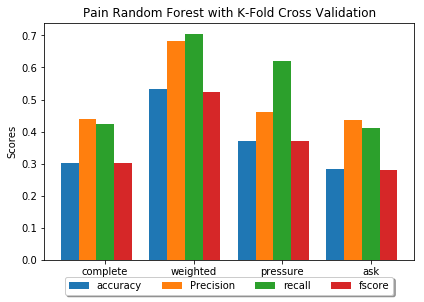

In [40]:
label='Pain'
asklabel='Pain'

res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
 
for estimators in range (100,1000,100):
    res_acc,res_scores=randomForest10Fold(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest10Fold(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest10Fold(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest10Fold(ask,ask_labels,1000,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''

x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest with K-Fold Cross Validation",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)


import os.path
if not os.path.exists('Forrest_StatsFoldTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsFoldTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsFoldTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsFoldTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

Counter({0: 1168, 1: 389})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 89, 1: 41})
Counter({0: 334, 1: 128})
Counter({0: 590, 1: 166})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.7501605651894669 # Scores: (0.37508028259473347, 0.5, 0.42852961436643233)
Wei: Accuracy: 0.7230443974630022 # Scores: (0.8263789318256883, 0.5836959336959336, 0.544494763223949)
Bld: Accuracy: 0.7272727272727272 # Scores: (0.7802574246072699, 0.5105505838699115, 0.4433004327497268)
Ask: Accuracy: 0.7804232804232804 # Scores: (0.3902116402116402, 0.5, 0.4381068967937769)
Counter({0: 1168, 1: 389})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 89, 1: 41})
Counter({0: 334, 1: 128})
Counter({0: 590, 1: 166})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.7501605651894669 # Scores: (0.37508028259473347, 0.5, 0.42852961436643233)
Wei: Accuracy: 0.7230443974630022 # Scores: (0.8263789318256883, 0.5836959336959336, 0.544494763223949)
Bld: Accuracy: 0.7272727272727272 # Scores: (0.7802574246072699, 0.5105505838699115, 0.4433004327497268)
Ask: Accuracy: 0.7804232804232804 # Scores: (0.3902116402116402, 0.5, 0.4381068967937769)
Counter({0: 1168, 1: 389})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 89, 1: 41})
Counter({0: 334, 1: 128})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 166})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.7501605651894669 # Scores: (0.37508028259473347, 0.5, 0.42852961436643233)
Wei: Accuracy: 0.7230443974630022 # Scores: (0.8263789318256883, 0.5836959336959336, 0.544494763223949)
Bld: Accuracy: 0.7251082251082251 # Scores: (0.6128126689272201, 0.5067627050820328, 0.4353649307077609)
Ask: Accuracy: 0.7804232804232804 # Scores: (0.3902116402116402, 0.5, 0.4381068967937769)
Counter({0: 1168, 1: 389})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 89, 1: 41})
Counter({0: 334, 1: 128})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 166})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.7501605651894669 # Scores: (0.37508028259473347, 0.5, 0.42852961436643233)
Wei: Accuracy: 0.7307963354474983 # Scores: (0.8357277543324054, 0.6003626003626003, 0.5619187515986416)
Bld: Accuracy: 0.7251082251082251 # Scores: (0.6128126689272201, 0.5067627050820328, 0.4353649307077609)
Ask: Accuracy: 0.7804232804232804 # Scores: (0.3902116402116402, 0.5, 0.4381068967937769)
Counter({0: 1168, 1: 389})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 89, 1: 41})
Counter({0: 334, 1: 128})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 166})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.7501605651894669 # Scores: (0.37508028259473347, 0.5, 0.42852961436643233)
Wei: Accuracy: 0.7307963354474983 # Scores: (0.8357277543324054, 0.6003626003626003, 0.5619187515986416)
Bld: Accuracy: 0.722943722943723 # Scores: (0.4454032809295967, 0.5033613445378151, 0.4281744844475472)
Ask: Accuracy: 0.7804232804232804 # Scores: (0.3902116402116402, 0.5, 0.4381068967937769)
Counter({0: 1168, 1: 389})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 89, 1: 41})
Counter({0: 334, 1: 128})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 166})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.7501605651894669 # Scores: (0.37508028259473347, 0.5, 0.42852961436643233)
Wei: Accuracy: 0.7307963354474983 # Scores: (0.8357277543324054, 0.6003626003626003, 0.5619187515986416)
Bld: Accuracy: 0.7272727272727274 # Scores: (0.6963896669779023, 0.5081632653061224, 0.43630706287683035)
Ask: Accuracy: 0.7804232804232804 # Scores: (0.3902116402116402, 0.5, 0.4381068967937769)
Counter({0: 1168, 1: 389})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 89, 1: 41})
Counter({0: 334, 1: 128})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 166})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.7501605651894669 # Scores: (0.37508028259473347, 0.5, 0.42852961436643233)
Wei: Accuracy: 0.7230443974630022 # Scores: (0.8263789318256883, 0.5836959336959336, 0.544494763223949)
Bld: Accuracy: 0.7272727272727274 # Scores: (0.6963896669779023, 0.5081632653061224, 0.43630706287683035)
Ask: Accuracy: 0.7804232804232804 # Scores: (0.3902116402116402, 0.5, 0.4381068967937769)
Counter({0: 1168, 1: 389})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 89, 1: 41})
Counter({0: 334, 1: 128})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 166})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.7501605651894669 # Scores: (0.37508028259473347, 0.5, 0.42852961436643233)
Wei: Accuracy: 0.7230443974630022 # Scores: (0.8263789318256883, 0.5836959336959336, 0.544494763223949)
Bld: Accuracy: 0.7272727272727274 # Scores: (0.6963896669779023, 0.5081632653061224, 0.43630706287683035)
Ask: Accuracy: 0.7804232804232804 # Scores: (0.3902116402116402, 0.5, 0.4381068967937769)
Counter({0: 1168, 1: 389})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 89, 1: 41})
Counter({0: 334, 1: 128})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({0: 590, 1: 166})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.7501605651894669 # Scores: (0.37508028259473347, 0.5, 0.42852961436643233)
Wei: Accuracy: 0.7230443974630022 # Scores: (0.8263789318256883, 0.5836959336959336, 0.544494763223949)
Bld: Accuracy: 0.7272727272727274 # Scores: (0.6963896669779023, 0.5081632653061224, 0.43630706287683035)
Ask: Accuracy: 0.7804232804232804 # Scores: (0.3902116402116402, 0.5, 0.4381068967937769)


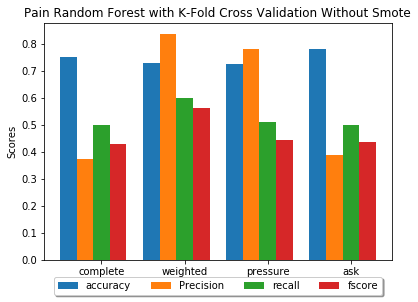

In [45]:
label='Pain'
asklabel='Pain'

res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
for estimators in range (100,1000,100):
    
    res_acc,res_scores=randomForest10FoldNotSmote(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest10FoldNotSmote(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest10FoldNotSmote(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest10FoldNotSmote(ask,ask_labels,1000,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''
x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest with K-Fold Cross Validation Without Smote",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)




import os.path
if not os.path.exists('Forrest_StatsFoldSmotelessTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsFoldSmotelessTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsFoldSmotelessTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsFoldSmotelessTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()


In [27]:
#ask_scores[9]

### SVM Classifier Function

In [50]:
def SVM(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = SVC(gamma='auto')
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### SVM  

Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.5475792988313857 # Scores: (0.5517347455786908, 0.5478093645484949, 0.5389389252919106, None)
Wei: Accuracy: 0.7678571428571429 # Scores: (0.8414634146341464, 0.7678571428571428, 0.7546343107516009, None)
Bld: Accuracy: 0.6564102564102564 # Scores: (0.8005952380952381, 0.6436170212765957, 0.5986051798826385, None)
Ask: Accuracy: 0.6301775147928994 # Scores: (0.6394527802294792, 0.6328428796636889, 0.6266183553532765, None)


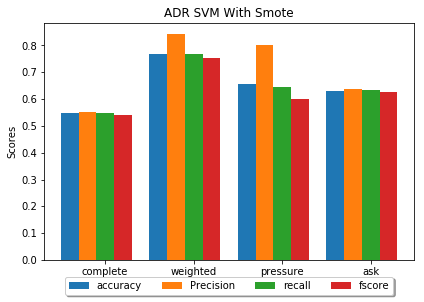

In [53]:
label='ADR'
asklabel='ADR'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=SVM(result,result_labels,"Result")
wei_acc,wei_scores=SVM(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
#Stats.to_excel('SVMresult_Stats'+label+'.xlsx') 

plotResult(label+" SVM With Smote",Stats,Stats,Stats,Stats,0,1,2,3)

import os.path
if not os.path.exists('SVM'+'.xlsx'):
    writer = pd.ExcelWriter('SVM'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('SVM'+'.xlsx', engine='openpyxl')
book = load_workbook('SVM'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

Stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()



C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 6], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 5, 7, 8, 17], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 5, 8], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 6], dtype='int64')
Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 274, 0: 274})
Counter({0: 608, 1: 608})
Res: Accuracy: 0.688622754491018 # Scores: (0.688735650510204, 0.6886454183266932, 0.6885917378554124, None)
Wei: Accuracy: 0.75 # Scores: (0.78125, 0.75, 0.7428571428571429, None)
Bld: Accuracy: 0.7272727272727273 # Scores: (0.7319230769230769, 0.7221485411140584, 0.7223364870423694, None)
Ask: Accuracy: 0.7315068493150685 # Scores: (0.7546895724120508, 0.7443939393939394, 0.7304364864050159, None)


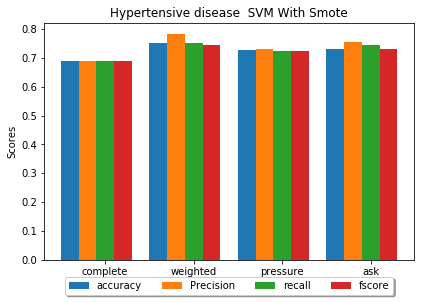

In [36]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=SVM(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=SVM(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=SVM(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
#Stats.to_excel('SVMresult_Stats'+label+'.xlsx') 

plotResult(label+" SVM With Smote",Stats,Stats,Stats,Stats,0,1,2,3)

import os.path
if not os.path.exists('SVM'+'.xlsx'):
    writer = pd.ExcelWriter('SVM'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('SVM'+'.xlsx', engine='openpyxl')
book = load_workbook('SVM'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

Stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

In [31]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=SVM(result,result_labels,"Result")
wei_acc,wei_scores=SVM(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats'+label+'smoteless.xlsx') 


Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.7008547008547008 # Scores: (0.7057175312381674, 0.6985745614035088, 0.697400750032329, None)
Wei: Accuracy: 0.7692307692307693 # Scores: (0.8783783783783784, 0.5909090909090909, 0.5846153846153846, None)
Bld: Accuracy: 0.7050359712230215 # Scores: (0.6891483516483516, 0.6521883289124668, 0.6570379731600168, None)
Ask: Accuracy: 0.8414096916299559 # Scores: (0.9203539823008849, 0.5135135135135135, 0.48304655870445345, None)


In [32]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=SVM(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=SVM(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=SVM(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats'+label+'importancesmoteless.xlsx') 


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.6538461538461539 # Scores: (0.6583358848744643, 0.6512061403508772, 0.6488179055806715, None)
Wei: Accuracy: 0.7692307692307693 # Scores: (0.8783783783783784, 0.5909090909090909, 0.5846153846153846, None)
Bld: Accuracy: 0.697841726618705 # Scores: (0.7097902097902098, 0.6193633952254642, 0.6132750397456279, None)
Ask: Accuracy: 0.8281938325991189 # Scores: (0.5874811463046757, 0.5165007112375534, 0.49906637243252416, None)


### SVM 10-Fold Function

In [33]:
def SVM10Fold(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = SVC(gamma='auto')
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [34]:
def SVM10FoldNoSmote(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)
    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
        clf = SVC(gamma='auto')
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### SVM 10-Fold

In [35]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=SVM10Fold(result,result_labels,"Result")
wei_acc,wei_scores=SVM10Fold(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM10Fold(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM10Fold(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats10Fold'+label+'.xlsx') 

Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 274, 0: 274})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 608, 1: 608})
Res: Accuracy: 0.663101507827718 # Scores: (0.6725628520390469, 0.6761496377396277, 0.6544962946953283)
Wei: Accuracy: 0.71875 # Scores: (0.6280934343434343, 0.5980259324009325, 0.5963648583247174)
Bld: Accuracy: 0.721010101010101 # Scores: (0.6759517266538593, 0.6614434322260432, 0.6522931172587427)
Ask: Accuracy: 0.7445874542744886 # Scores: (0.611755069769185, 0.647484170480776, 0.585458690933904)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [36]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=SVM10FoldNoSmote(result,result_labels,"Result")
wei_acc,wei_scores=SVM10FoldNoSmote(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM10FoldNoSmote(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM10FoldNoSmote(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats10Fold'+label+'smoteless.xlsx') 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.6455004135649297 # Scores: (0.6500318744362645, 0.6541848478293254, 0.6292282548625472)
Wei: Accuracy: 0.6615384615384615 # Scores: (0.7013419913419913, 0.6378571428571428, 0.5933210253798489)
Bld: Accuracy: 0.7140610545790935 # Scores: (0.7208260334375953, 0.6703590938075548, 0.66206667853428)
Ask: Accuracy: 0.8039298245614035 # Scores: (0.40196491228070175, 0.5, 0.4449683813348536)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
#result

### Naive Bayes Function

In [54]:
def NB(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### Naive Bayes 

In [55]:
label='ADR'
asklabel='ADR'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=NB(result,result_labels,"Result")
wei_acc,wei_scores=NB(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'.xlsx') 

Counter({0: 997, 1: 997})
Counter({0: 93, 1: 93})
Counter({1: 325, 0: 325})
Counter({0: 562, 1: 562})
Res: Accuracy: 0.8163606010016694 # Scores: (0.8420874852220908, 0.8161315496098105, 0.8127656914228558, None)
Wei: Accuracy: 0.875 # Scores: (0.8793548387096775, 0.875, 0.8746402302526384, None)
Bld: Accuracy: 0.7846153846153846 # Scores: (0.7883718465126139, 0.7865493996208132, 0.7844736842105264, None)
Ask: Accuracy: 0.9053254437869822 # Scores: (0.921951219512195, 0.9030303030303031, 0.9039806825041724, None)


In [40]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=NB(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=NB(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=NB(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=NB(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'importance.xlsx') 

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 274, 0: 274})
Counter({0: 608, 1: 608})
Res: Accuracy: 0.7005988023952096 # Scores: (0.7024743560886202, 0.7006932270916335, 0.6999664633172571, None)
Wei: Accuracy: 0.6041666666666666 # Scores: (0.6043478260869566, 0.6041666666666667, 0.6039947894051236, None)
Bld: Accuracy: 0.7090909090909091 # Scores: (0.7106270238445687, 0.7108753315649867, 0.7090802233323539, None)
Ask: Accuracy: 0.7342465753424657 # Scores: (0.7854922456787593, 0.7532575757575758, 0.7299575162650924, None)


In [41]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=NB(result,result_labels,"Result")
wei_acc,wei_scores=NB(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'smoteless.xlsx') 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5961538461538461 # Scores: (0.5965403562665068, 0.5941885964912281, 0.5927155519742143, None)
Wei: Accuracy: 0.7692307692307693 # Scores: (0.7607142857142857, 0.6185064935064934, 0.6285714285714286, None)
Bld: Accuracy: 0.6546762589928058 # Scores: (0.6555900621118013, 0.6661140583554377, 0.6494325346784363, None)
Ask: Accuracy: 0.7268722466960352 # Scores: (0.5522242604907132, 0.5647937411095305, 0.5552957532861476, None)


In [42]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=NB(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=NB(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=NB(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=NB(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'importancesmoteless.xlsx') 


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.6602564102564102 # Scores: (0.6664379192360481, 0.6573464912280702, 0.6543847507930685, None)
Wei: Accuracy: 0.6410256410256411 # Scores: (0.5568181818181819, 0.5568181818181819, 0.5568181818181819, None)
Bld: Accuracy: 0.7338129496402878 # Scores: (0.7273351648351649, 0.6829133510167993, 0.690497683095625, None)
Ask: Accuracy: 0.748898678414097 # Scores: (0.6051587301587301, 0.6432432432432433, 0.6146010186757216, None)


### Naive Bayes 10-Fold Function

In [43]:
def NB10Fold(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = GaussianNB()
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [44]:
def NB10FoldNoSmote(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
        clf = GaussianNB()
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### Naive Bayes 10-Fold

In [45]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=NB10Fold(result,result_labels,"Result")
wei_acc,wei_scores=NB10Fold(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB10Fold(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB10Fold(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats10Fold'+label+'.xlsx') 

Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 274, 0: 274})
Counter({0: 608, 1: 608})
Res: Accuracy: 0.6234579034701682 # Scores: (0.6318923229476339, 0.6370319013726595, 0.616576877324976)
Wei: Accuracy: 0.64375 # Scores: (0.6608391608391608, 0.6215792540792541, 0.6038139775601076)
Bld: Accuracy: 0.6396296296296295 # Scores: (0.6491948105664025, 0.6535476874467434, 0.6193045413380015)
Ask: Accuracy: 0.7949193876168541 # Scores: (0.631730492224762, 0.6596810810067578, 0.6086214410048887)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [46]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=NB10FoldNoSmote(result,result_labels,"Result")
wei_acc,wei_scores=NB10FoldNoSmote(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB10FoldNoSmote(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB10FoldNoSmote(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats10Fold'+label+'smoteless.xlsx') 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 608, 1: 148})
Res: Accuracy: 0.6255831265508685 # Scores: (0.6182491779207331, 0.6213850965425614, 0.6065100342360275)
Wei: Accuracy: 0.6615384615384615 # Scores: (0.6634271284271284, 0.637815934065934, 0.6191472090001502)
Bld: Accuracy: 0.5820536540240517 # Scores: (0.6295602920081275, 0.6227280945618786, 0.5750316306946438)
Ask: Accuracy: 0.7247719298245615 # Scores: (0.5558101469813034, 0.5342128228029481, 0.5139073914356317)


In [47]:
'''from collections import Counter
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[0, 1,3])
X_res, y_res = sm.fit_resample(result, result_labels)
print(Counter(result_labels))
print(Counter(y_res))
print(X_res)
print(y_res)
print(result_labels)'''

'from collections import Counter\nfrom imblearn.over_sampling import SMOTENC\nsm = SMOTENC(random_state=42, categorical_features=[0, 1,3])\nX_res, y_res = sm.fit_resample(result, result_labels)\nprint(Counter(result_labels))\nprint(Counter(y_res))\nprint(X_res)\nprint(y_res)\nprint(result_labels)'

In [23]:
print(result_labels.value_counts())
print(weighted_labels.value_counts())
print(blood_labels.value_counts())
print(ask_labels.value_counts())

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [49]:
print(result_labels.value_counts())
print(weighted_labels.value_counts())
print(blood_labels.value_counts())
print(ask_labels.value_counts())

0    834
1    723
Name: Hypertensive disease , dtype: int64
1    80
0    50
Name: Hypertensive disease , dtype: int64
1    274
0    188
Name: Hypertensive disease , dtype: int64
0    608
1    148
Name: Hypertensive disease , dtype: int64


In [50]:
res_scores[0]

0.6182491779207331

In [51]:
pd.DataFrame(result)

,Age,Gender,DrugFamily,Drug,ADRCount,MentalCount,DieaseCount,Pain,Fatigue,Vertigo,...,Headache,Anxiety,Mental Suffering,Pvc,MUNGAN SYNDROME,"MICROCEPHALY , EPILEPSY , AND DIABETES SYNDROME",Brachial Amyotrophic Diplegia,Infection,Diabetes,Sinusitis
0,42.0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,40.0,1,2,0,1,1,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,42.0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,70.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,63.0,1,2,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,45.0,0,2,0,0,1,2,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,42.0,1,2,0,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,1
8,32.0,1,2,0,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,21.0,0,2,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
wei_acc


0.6615384615384615

In [53]:
ask_acc

0.7247719298245615

In [54]:
res_scores

(0.6182491779207331, 0.6213850965425614, 0.6065100342360275)

In [55]:
wei_scores

(0.6634271284271284, 0.637815934065934, 0.6191472090001502)

In [56]:
ask_scores

(0.5558101469813034, 0.5342128228029481, 0.5139073914356317)